In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# deep learning
import tensorflow as tf

In [2]:
df = pd.read_csv("https://deeplearning-hw-booth.s3.us-west-2.amazonaws.com/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
df.shape

(34299, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
for col in df.columns:
  if df[col].dtype == object:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

NAME
19568
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

APPLICATION_TYPE
17
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7 

In [6]:
df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_sub = df.loc[:, ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL']]
df_sub.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Look at APPLICATION_TYPE value counts for binning
df_sub["APPLICATION_TYPE"].value_counts().to_dict()

{'T3': 27037,
 'T4': 1542,
 'T6': 1216,
 'T5': 1173,
 'T19': 1065,
 'T8': 737,
 'T7': 725,
 'T10': 528,
 'T9': 156,
 'T13': 66,
 'T12': 27,
 'T2': 16,
 'T25': 3,
 'T14': 3,
 'T29': 2,
 'T15': 2,
 'T17': 1}

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
vals = df_sub["APPLICATION_TYPE"].value_counts().to_dict()
application_types_to_replace = [x for x in vals.keys() if vals[x] < 700]

# Replace in dataframe
for app in application_types_to_replace:
    df_sub['APPLICATION_TYPE'] = df_sub['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df_sub['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
df_sub["CLASSIFICATION"].value_counts()[0:20]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
vals = df_sub["CLASSIFICATION"].value_counts().to_dict()
classifications_to_replace = [x for x in vals.keys() if vals[x] < 700]

# Replace in dataframe
for cls in classifications_to_replace:
    df_sub['CLASSIFICATION'] = df_sub['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df_sub['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
df_sub = pd.get_dummies(df_sub)
df_sub.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
df_sub.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [14]:
df_sub["ASK_AMT"].values.reshape(-1, 1)

array([[    5000],
       [  108590],
       [    5000],
       ...,
       [    5000],
       [    5000],
       [36500179]], dtype=int64)

In [15]:
scaler = StandardScaler()
df_sub["ASK_AMT"] = scaler.fit_transform(df_sub["ASK_AMT"].values.reshape(-1, 1))
df_sub.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,-0.031725,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,-0.030536,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,-0.031725,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,-0.031706,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,-0.030146,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [16]:
df_sub.ASK_AMT.describe()

count    3.429900e+04
mean    -5.898483e-15
std      1.000015e+00
min     -3.172529e-02
25%     -3.172529e-02
50%     -3.172529e-02
75%     -3.169382e-02
max      9.864705e+01
Name: ASK_AMT, dtype: float64

In [17]:
df_sub.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [18]:
df_sub.drop('SPECIAL_CONSIDERATIONS_Y', axis=1, inplace=True)

In [19]:
# Split our preprocessed data into our features and target arrays
X = df_sub.drop(["IS_SUCCESSFUL"], axis=1).values
y = df_sub["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499927111577597
0.25000728884224027


In [20]:
# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

Compile, Train and Evaluate the Model

In [21]:
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 387       
                                                                 
 dense_1 (Dense)             (None, 5)                 50        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train, y_train, epochs=25)

Epoch 1/25
804/804 [==============================] - 2s 2ms/step - loss: 0.6323 - accuracy: 0.6945
Epoch 2/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5658 - accuracy: 0.7245
Epoch 3/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7277
Epoch 4/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.7302
Epoch 5/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5552 - accuracy: 0.7312
Epoch 6/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7323
Epoch 7/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7317
Epoch 8/25
804/804 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7310
Epoch 9/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7315
Epoch 10/25
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7322

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5557 - accuracy: 0.7224 - 674ms/epoch - 3ms/step
Loss: 0.5556683540344238, Accuracy: 0.722449004650116


<AxesSubplot:>

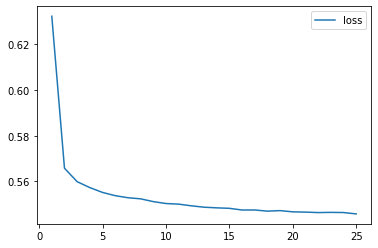

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

<AxesSubplot:>

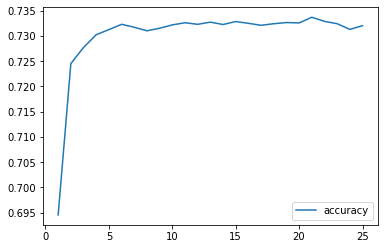

In [25]:
history_df.plot(y="accuracy")

In [26]:
nn.save('ml_model.h5')

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Compile the model
#  YOUR CODE GOES HERE

In [ ]:
# Train the model
#  YOUR CODE GOES HERE

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'X_test_scaled' is not defined

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE